<a href="https://colab.research.google.com/github/sreevaishnavirao/Image-corruption/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow opencv-python opencv-python-headless numpy pandas matplotlib torch torchvision torchaudio



In [3]:
!kaggle datasets download -d alvarobasily/road-damage -p "/root/Untitled Folder" --unzip


Dataset URL: https://www.kaggle.com/datasets/alvarobasily/road-damage
License(s): CC0-1.0
100% 1.63G/1.64G [00:48<00:00, 39.6MB/s]
100% 1.64G/1.64G [00:48<00:00, 36.5MB/s]


In [4]:
!ls /root/Untitled\ Folder


A_2890.jpeg    AR_5460.txt    C_3380.jpeg   G_1420.jpeg   P_11950.txt	R_5840.jpeg   X_9740.txt
A_2890.txt     AS_6920.jpeg   C_3380.txt    G_1420.txt	  P_11960.jpeg	R_5840.txt    Y_13560.jpeg
A_3190.jpeg    AS_6920.txt    C_3430.jpeg   G_1560.jpeg   P_11960.txt	R_5850.jpeg   Y_13560.txt
A_3190.txt     AS_6930.jpeg   C_3430.txt    G_1560.txt	  P_11970.jpeg	R_5850.txt    Y_13570.jpeg
A_3200.jpeg    AS_6930.txt    C_3490.jpeg   G_1620.jpeg   P_11970.txt	R_5860.jpeg   Y_13570.txt
A_3200.txt     AS_6940.jpeg   C_3490.txt    G_1620.txt	  P_11980.jpeg	R_5860.txt    Y_13580.jpeg
A_5760.jpeg    AS_6940.txt    C_3510.jpeg   G_1680.jpeg   P_11980.txt	R_5870.jpeg   Y_13580.txt
A_5760.txt     AS_7010.jpeg   C_3510.txt    G_1680.txt	  P_11990.jpeg	R_5870.txt    Y_13590.jpeg
A_6180.jpeg    AS_7010.txt    C_3560.jpeg   G_1730.jpeg   P_11990.txt	R_5880.jpeg   Y_13590.txt
A_6180.txt     AS_7020.jpeg   C_3560.txt    G_1730.txt	  P_12000.jpeg	R_5880.txt    Y_13600.jpeg
A_8360.jpeg    AS_7020.txt    C_3610

In [5]:
import os

def check_data_structure(dataset_path):
    image_files = [f for f in os.listdir(dataset_path) if f.endswith('.jpeg') or f.endswith('.jpg')]
    label_files = [f for f in os.listdir(dataset_path) if f.endswith('.txt')]

    print(f"Found {len(image_files)} images and {len(label_files)} label files.")

# Replace '/root/Untitled Folder' with the actual dataset path
check_data_structure('/root/Untitled Folder')


Found 3321 images and 3322 label files.


In [7]:
import os
import shutil
from sklearn.model_selection import train_test_split

def split_dataset(dataset_path, output_path):
    # Get all image files from the dataset folder
    image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.jpeg', '.jpg', '.png'))]

    # Split into train and validation sets (80-20 split)
    train_images, val_images = train_test_split(image_files, test_size=0.2, random_state=42)

    # Create necessary directories for YOLOv5
    os.makedirs(os.path.join(output_path, 'images/train'), exist_ok=True)
    os.makedirs(os.path.join(output_path, 'images/val'), exist_ok=True)
    os.makedirs(os.path.join(output_path, 'labels/train'), exist_ok=True)
    os.makedirs(os.path.join(output_path, 'labels/val'), exist_ok=True)

    # Move images and their corresponding labels
    for img in train_images:
        shutil.move(os.path.join(dataset_path, img), os.path.join(output_path, 'images/train', img))
        label_file = img.replace('.jpeg', '.txt').replace('.jpg', '.txt').replace('.png', '.txt')
        shutil.move(os.path.join(dataset_path, label_file), os.path.join(output_path, 'labels/train', label_file))

    for img in val_images:
        shutil.move(os.path.join(dataset_path, img), os.path.join(output_path, 'images/val', img))
        label_file = img.replace('.jpeg', '.txt').replace('.jpg', '.txt').replace('.png', '.txt')
        shutil.move(os.path.join(dataset_path, label_file), os.path.join(output_path, 'labels/val', label_file))

# Now call the function to split the dataset
split_dataset('/root/Untitled Folder', '/root/road_damage_dataset')


In [8]:
 yaml_content = """
train: /root/road_damage_dataset/images/train
val: /root/road_damage_dataset/images/val

nc: 4  # Number of road damage classes (adjust based on your dataset)
names: ['Crack', 'Pothole', 'Separation', 'OtherDamage']  # Class names (adjust as per your dataset)
"""

# Write this content to a file
with open('/root/road_damage.yaml', 'w') as f:
    f.write(yaml_content)


In [9]:
# Clone the YOLOv5 repository from GitHub
!git clone https://github.com/ultralytics/yolov5

# Navigate to the YOLOv5 directory
%cd yolov5



Cloning into 'yolov5'...
remote: Enumerating objects: 17018, done.
remote: Counting objects: 100% (213/213), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 17018 (delta 120), reused 124 (delta 68), pack-reused 16805 (from 1)
Receiving objects: 100% (17018/17018), 15.73 MiB | 25.41 MiB/s, done.
Resolving deltas: 100% (11658/11658), done.
/content/yolov5


In [10]:
# Install necessary dependencies for YOLOv5
!pip install -r requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 28.9 MB/s eta 0:00:00


In [11]:
# Train the YOLOv5 model
!python train.py --img 416 --batch 16 --epochs 20 --data /root/road_damage.yaml --weights yolov5s.pt --cache


Streaming output truncated to the last 5000 lines.
       5/19      1.57G    0.08483    0.01974    0.01727         48        416:  20% 34/166 [00:05<00:27,  4.88it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       5/19      1.57G    0.08473    0.01978    0.01727         62        416:  21% 35/166 [00:06<00:28,  4.61it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       5/19      1.57G    0.08439    0.01959    0.01738         36        416:  22% 36/166 [00:06<00:32,  4.04it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       5/19      1.57G    0.08425 

In [12]:
import torch

# Load the best trained model (replace 'exp' with the correct folder if needed)
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp/weights/best.pt')

# Check the model's class names
print(model.names)  # This should print the class names like ['Crack', 'Pothole', 'Separation', 'OtherDamage']


/usr/local/lib/python3.10/dist-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-10-21 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


{0: 'Crack', 1: 'Pothole', 2: 'Separation', 3: 'OtherDamage'}


In [13]:
# List all the images in the training folder to ensure that images exist
!ls /root/road_damage_dataset/images/train


A_2890.jpeg    AS_9810.jpeg   C_3340.jpeg   F_9910.jpeg   P_11950.jpeg	R_5860.jpeg   X_9720.jpeg
A_3190.jpeg    AW_4310.jpeg   C_3360.jpeg   F_9930.jpeg   P_11970.jpeg	R_5870.jpeg   X_9730.jpeg
A_5760.jpeg    AW_4320.jpeg   C_3430.jpeg   F_9950.jpeg   P_11980.jpeg	R_5880.jpeg   Y_13560.jpeg
A_8360.jpeg    AX_1000.jpeg   C_3490.jpeg   F_9990.jpeg   P_11990.jpeg	R_5890.jpeg   Y_13570.jpeg
A_8390.jpeg    AX_10010.jpeg  C_3560.jpeg   G_1290.jpeg   P_12000.jpeg	R_5900.jpeg   Y_13580.jpeg
A_8420.jpeg    AX_10410.jpeg  C_3610.jpeg   G_1420.jpeg   P_12020.jpeg	R_5910.jpeg   Y_13610.jpeg
A_8430.jpeg    AX_10470.jpeg  C_3630.jpeg   G_1620.jpeg   P_12030.jpeg	R_5920.jpeg   Y_13620.jpeg
A_9240.jpeg    AX_10530.jpeg  C_3650.jpeg   G_1680.jpeg   P_12040.jpeg	R_6060.jpeg   Y_13630.jpeg
A_9370.jpeg    AX_10540.jpeg  C_3670.jpeg   G_1730.jpeg   P_12050.jpeg	R_6070.jpeg   Y_13640.jpeg
AA_10800.jpeg  AX_1400.jpeg   C_3760.jpeg   G_1770.jpeg   P_16350.jpeg	R_6080.jpeg   Y_13650.jpeg
AA_10810.jpeg  AX_1420

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


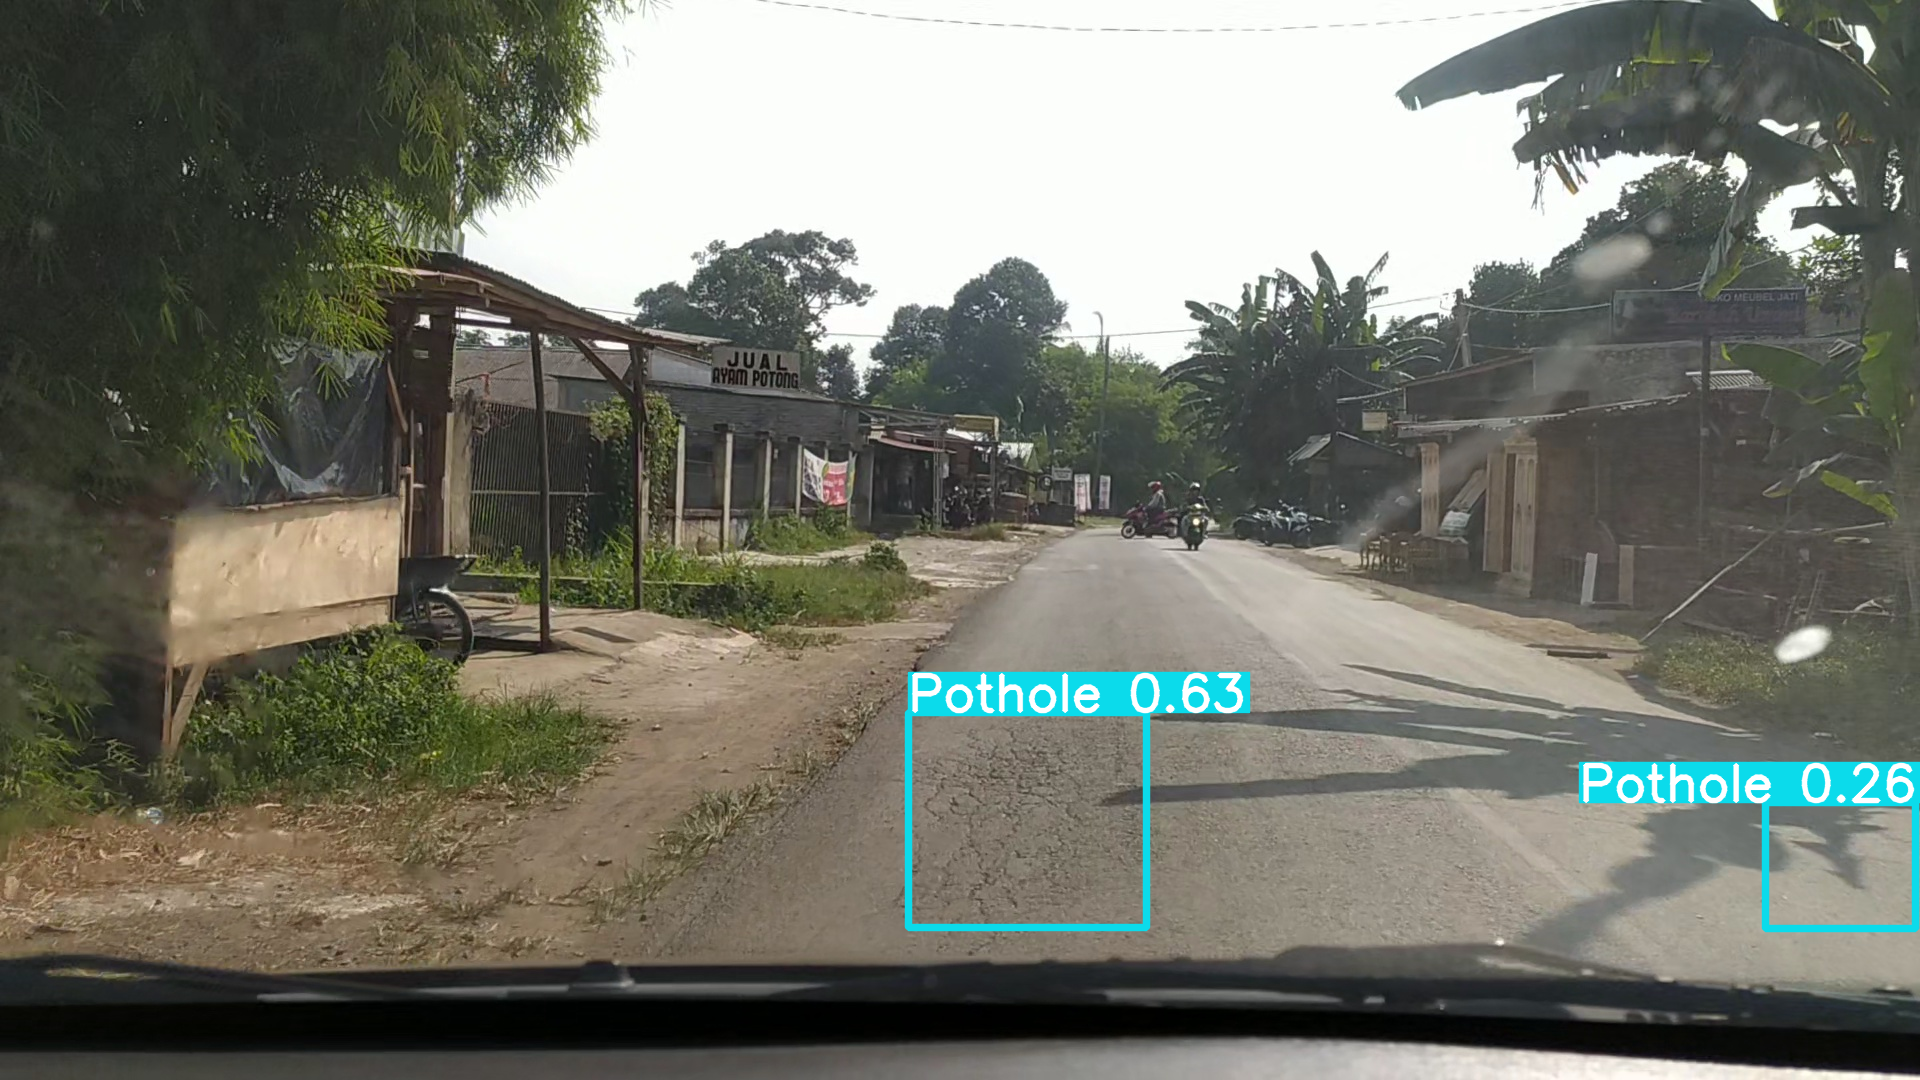

Saved 1 image to runs/detect/exp8


In [28]:
# Use one of the images from the validation set for inference
img_path = '/root/road_damage_dataset/images/val/AM_1400.jpeg'  # Adjust this with any other image file if needed

# Perform inference
results = model(img_path)

# Display the results (shows the image with bounding boxes)
results.show()

# Save the results to disk (will save in 'runs/detect/exp' folder by default)
results.save()


In [22]:
# Run validation to calculate evaluation metrics on the validation dataset
!python val.py --data /root/road_damage.yaml --weights /content/yolov5/runs/train/exp/weights/best.pt --img 416


val: data=/root/road_damage.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-377-g24ee2801 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /root/road_damage_dataset/labels/val.cache... 665 images, 0 backgrounds, 0 corrupt: 100% 665/665 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 21/21 [00:18<00:00,  1.11it/s]
                   all        665       1333       0.57      0.472      0.474       0.19
                 Crack        665        512       0.64      0.553      0.568      0.224
         

In [24]:
# Validate the model on the validation dataset
!python val.py --data /root/road_damage.yaml --weights /content/yolov5/runs/train/exp/weights/best.pt --img 416 --batch-size 16


val: data=/root/road_damage.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=16, imgsz=416, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-377-g24ee2801 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /root/road_damage_dataset/labels/val.cache... 665 images, 0 backgrounds, 0 corrupt: 100% 665/665 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 42/42 [00:20<00:00,  2.07it/s]
                   all        665       1333       0.57      0.472      0.474       0.19
                 Crack        665        512       0.64      0.553      0.568      0.224
         

In [25]:
# Save the results to a text file for further analysis
!python val.py --data /root/road_damage.yaml --weights /content/yolov5/runs/train/exp/weights/best.pt --img 416 --batch-size 16 --save-txt


val: data=/root/road_damage.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=16, imgsz=416, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-377-g24ee2801 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /root/road_damage_dataset/labels/val.cache... 665 images, 0 backgrounds, 0 corrupt: 100% 665/665 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0% 0/42 [00:00<?, ?it/s]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 42/42 [00:30<00:00,  1.37it/s]
                   all        

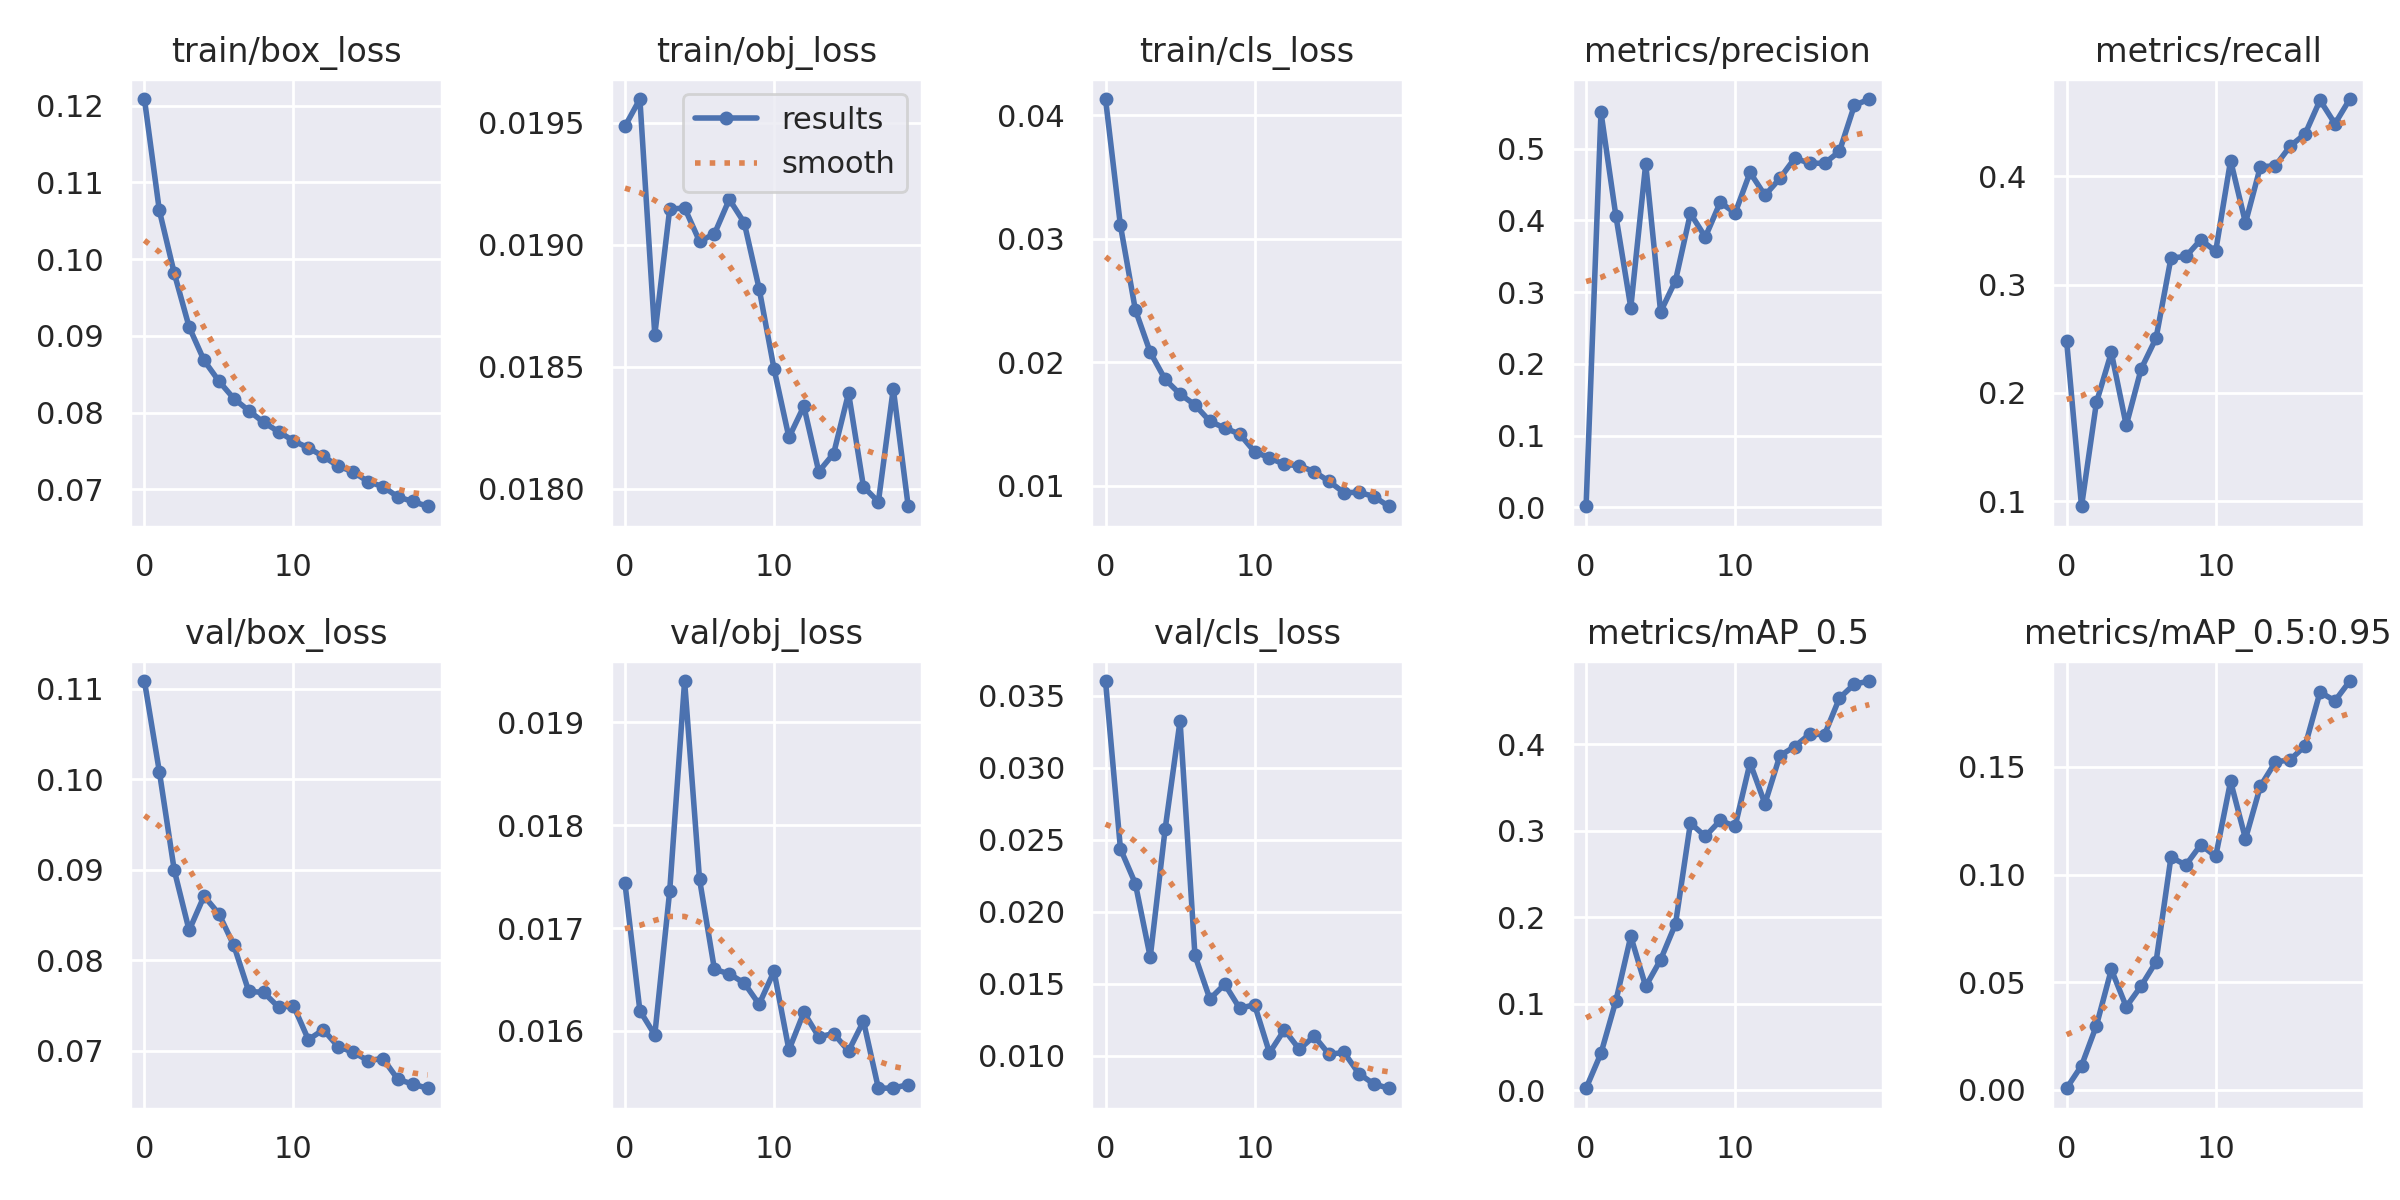

In [26]:
# Display training/validation plots (precision, recall, mAP, etc.)
from IPython.display import Image
Image(filename='/content/yolov5/runs/train/exp/results.png', width=800)
